In [2]:
import pandas as pd 

df=pd.read_csv('/home/smaniyar_umass_edu/BioNLP_Ontology/nlp/privacyQA/data/PrivacyQA_EMNLP/data/policy_test_data.csv',sep='\t')

In [3]:
df

,Folder,DocID,QueryID,SentID,Split,Query,Segment,Any_Relevant,Ann1,Ann2,Ann3,Ann4,Ann5,Ann6
0,../../Dataset/Test/com.fiverr.fiverr,Fiverr _1,Fiverr _1_0,Fiverr _1_0_0,test,is my chat here with the platform confidential?,At Fiverr we care about your privacy.,Irrelevant,Irrelevant,NaN,Irrelevant,Irrelevant,NaN,NaN
1,../../Dataset/Test/com.fiverr.fiverr,Fiverr _1,Fiverr _1_0,Fiverr _1_0_1,test,is my chat here with the platform confidential?,We do not sell or rent your personal informati...,Irrelevant,Irrelevant,NaN,Irrelevant,Irrelevant,NaN,NaN
2,../../Dataset/Test/com.fiverr.fiverr,Fiverr _1,Fiverr _1_0,Fiverr _1_0_2,test,is my chat here with the platform confidential?,We do not disclose it to others except as disc...,Irrelevant,Irrelevant,NaN,Irrelevant,Irrelevant,NaN,NaN
3,../../Dataset/Test/com.fiverr.fiverr,Fiverr _1,Fiverr _1_0,Fiverr _1_0_3,test,is my chat here with the platform confidential?,We collect information that you provide us o...,Relevant,Relevant,NaN,Irrelevant,Irrelevant,NaN,NaN
4,../../Dataset/Test/com.fiverr.fiverr,Fiverr _1,Fiverr _1_0,Fiverr _1_0_4,test,is my chat here with the platform confidential?,We will not share information that you provi...,Irrelevant,Irrelevant,NaN,Irrelevant,Irrelevant,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62145,../../Dataset/Test/com.viber.voip,Viber Messenger _8,Viber Messenger _8_49,Viber Messenger _8_49_161,test,what control do i have as a user to limit the ...,In the event you read this Privacy Policy in a...,Irrelevant,NaN,NaN,Irrelevant,NaN,Irrelevant,Irrelevant
62146,../../Dataset/Test/com.viber.voip,Viber Messenger _8,Viber Messenger _8_49,Viber Messenger _8_49_162,test,what control do i have as a user to limit the ...,Current Privacy policy PDF Version Viber Priva...,Irrelevant,NaN,NaN,Irrelevant,NaN,Irrelevant,Irrelevant
62147,../../Dataset/Test/com.viber.voip,Viber Messenger _8,Viber Messenger _8_49,Viber Messenger _8_49_163,test,what control do i have as a user to limit the ...,Previous PolicyPDF VersionViber Privacy Policy...,Irrelevant,NaN,NaN,Irrelevant,NaN,Irrelevant,Irrelevant
62148,../../Dataset/Test/com.viber.voip,Viber Messenger _8,Viber Messenger _8_49,Viber Messenger _8_49_164,test,what control do i have as a user to limit the ...,Previous Policy PDF VersionViber Privacy Polic...,Irrelevant,NaN,NaN,Irrelevant,NaN,Irrelevant,Irrelevant


In [4]:
sampled_df = df.groupby('Any_Relevant', group_keys=False).apply(
    lambda x: x.sample(
        n=int(1000 * len(x) / len(df)),  # proportional stratified sampling
        random_state=42
    )
).reset_index(drop=True)

# check sample size
print(sampled_df['Any_Relevant'].value_counts())
print("Total samples:", len(sampled_df))

# save sampled dataframe
sampled_df.to_csv("/home/smaniyar_umass_edu/BioNLP_Ontology/nlp/privacyQA/data/PrivacyQA_EMNLP/sampled_data/stratified_test_sample_1000.csv", index=False)


Any_Relevant
Irrelevant    900
Relevant       99
Name: count, dtype: int64
Total samples: 999


/tmp/ipykernel_4096265/2160434301.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Any_Relevant', group_keys=False).apply(


In [8]:
sampled_df['Any_Relevant'].value_counts()/len(sampled_df) * 100

Any_Relevant
Irrelevant    90.09009
Relevant       9.90991
Name: count, dtype: float64

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# === Load the model output CSV ===
OUTFILE = "/home/smaniyar_umass_edu/BioNLP_Ontology/nlp/privacyQA/test_results/qwen_2_5_privacy_qa.csv"
df = pd.read_csv(OUTFILE)

# === Normalize and map labels ===
def normalize_label(label):
    if not isinstance(label, str):
        return None
    label = label.strip().lower()
    if "relevant" in label:
        # specifically handle 'irrelevant' before 'relevant'
        if "irrelevant" in label:
            return 0
        return 1
    return None

df["gold"] = df["Any_Relevant"].apply(lambda x: 1 if str(x).strip().lower() == "relevant" else 0)
df["pred"] = df["final_label"].apply(normalize_label)

# === Drop rows with missing predictions ===
df = df.dropna(subset=["pred"])

# === Compute metrics ===
acc = accuracy_score(df["gold"], df["pred"])
f1 = f1_score(df["gold"], df["pred"])
cm = confusion_matrix(df["gold"], df["pred"])
report = classification_report(df["gold"], df["pred"], target_names=["Irrelevant", "Relevant"])

# === Print results ===
print("===============================================")
print("🔍  Qwen 2.5 Privacy QA Evaluation")
print("===============================================")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nDetailed Classification Report:")
print(report)

# === Optionally save results ===
# df.to_csv(OUTFILE.replace(".csv", "_scored.csv"), index=False)


🔍  Qwen 2.5 Privacy QA Evaluation
Accuracy: 0.8769
F1 Score: 0.2807

Confusion Matrix:
[[852  48]
 [ 75  24]]

Detailed Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.92      0.95      0.93       900
    Relevant       0.33      0.24      0.28        99

    accuracy                           0.88       999
   macro avg       0.63      0.59      0.61       999
weighted avg       0.86      0.88      0.87       999



In [3]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 105.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 77.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


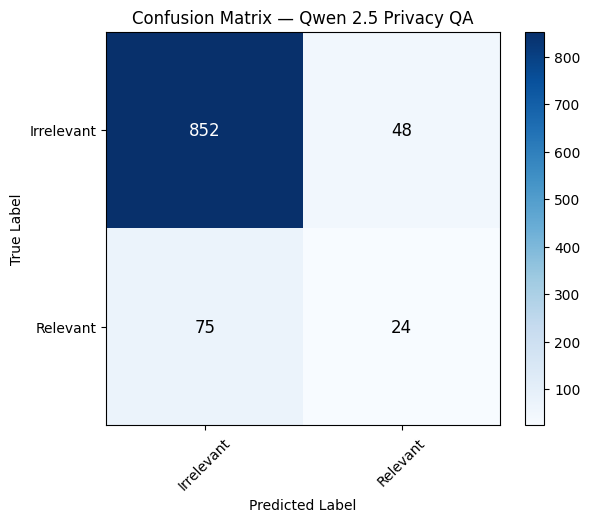

In [5]:

import matplotlib.pyplot as plt


# === Plot confusion matrix ===
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix — Qwen 2.5 Privacy QA")
plt.colorbar()

classes = ["Irrelevant", "Relevant"]
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Label cells with counts
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black",
            fontsize=12
        )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
# plt.savefig(CM_PLOT_FILE, dpi=300)
plt.show()

# print(f"\n✅ Confusion matrix saved to: {CM_PLOT_FILE}")


🔍  Qwen 2.5 Privacy QA Evaluation
Accuracy: 0.8769
F1 Score: 0.2807

Confusion Matrix (Counts):
 [[852  48]
 [ 75  24]]

Confusion Matrix (Normalized):
 [[0.947 0.053]
 [0.758 0.242]]

Detailed Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.92      0.95      0.93       900
    Relevant       0.33      0.24      0.28        99

    accuracy                           0.88       999
   macro avg       0.63      0.59      0.61       999
weighted avg       0.86      0.88      0.87       999



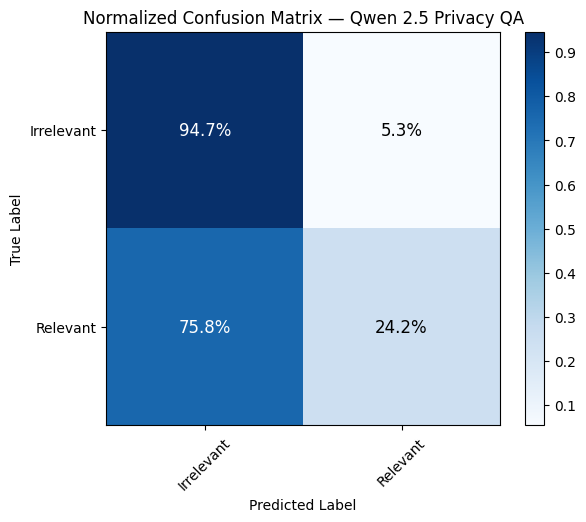

NameError: name 'CM_PLOT_FILE' is not defined

In [8]:
import numpy as np

# === Normalize and map labels ===
def normalize_label(label):
    if not isinstance(label, str):
        return None
    label = label.strip().lower()
    if "irrelevant" in label:
        return 0
    if "relevant" in label:
        return 1
    return None


# === Compute metrics ===
acc = accuracy_score(df["gold"], df["pred"])
f1 = f1_score(df["gold"], df["pred"])
cm = confusion_matrix(df["gold"], df["pred"])
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

report = classification_report(df["gold"], df["pred"], target_names=["Irrelevant", "Relevant"])

# === Print metrics ===
print("===============================================")
print("🔍  Qwen 2.5 Privacy QA Evaluation")
print("===============================================")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix (Counts):\n", cm)
print("\nConfusion Matrix (Normalized):\n", np.round(cm_normalized, 3))
print("\nDetailed Classification Report:\n", report)

# === Plot normalized confusion matrix ===
plt.figure(figsize=(6, 5))
plt.imshow(cm_normalized, interpolation="nearest", cmap="Blues")
plt.title("Normalized Confusion Matrix — Qwen 2.5 Privacy QA")
plt.colorbar()

classes = ["Irrelevant", "Relevant"]
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add percentage text in cells
thresh = cm_normalized.max() / 2
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(
            j, i, f"{cm_normalized[i, j]*100:.1f}%",
            ha="center", va="center",
            color="white" if cm_normalized[i, j] > thresh else "black",
            fontsize=12
        )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
# plt.savefig(CM_PLOT_FILE, dpi=300)
plt.show()

print(f"\n✅ Normalized confusion matrix saved to: {CM_PLOT_FILE}")
